# Alternus Vera Project

##Alternus Vera - Misleading Intention

- Name: Jignesh Madhani
- Id: 014501344


###Problem Statement: 
Fake news has been a real problem for the past many years. 2016 Elections was one of the most important events that was affected by the spread of fake news. Misleading nature of a news has steered many users to believe in wrong things. Here I am trying to identify, if a news story has misleading intentions or not. 

###Data Set:

1. Liar Liar DataSet
  - https://drive.google.com/file/d/1ZAPKJGzqHdOMtuXk7adGD5uTNSB6c9pc/view?usp=sharing
  - https://drive.google.com/file/d/1F3hO4WMfWQa0TIbs2h7pDEE4mEfLeA4z/view?usp=sharing

2. Scraped Data from Politifact
  - https://drive.google.com/file/d/1AcmdRAJpNXIzul2WN4Mnr-X8uAADZi0-/view?usp=sharing
  

*Importing the libraries*

***Data Scraping: Scraping Politifact***

In [5]:
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [2]:
pagesToGet= 2000

upperframe=[]  
for page in range(1,pagesToGet+1):
    print('processing page :', page)
    url = 'https://www.politifact.com/factchecks/list/?page='+str(page)
    print(url)
    
    try:
        page=requests.get(url)                            
    except Exception as e:                                
        error_type, error_obj, error_info = sys.exc_info()    
        print ('ERROR FOR LINK:',url)                         
        print (error_type, 'Line:', error_info.tb_lineno)     
        continue                                  
    time.sleep(2)   
    soup=BeautifulSoup(page.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    print(len(links))
    filename="NEWS.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Statement,Link,Date, Source, Label, Content\n"
    f.write(headers)
    
    for j in links:
        Statement = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        
        try:
            #use the browser to get the url. This is suspicious command that might blow up.
            innerPage=requests.get(Link)                             # this might throw an exception if something goes wrong.
            print(Link)
        except Exception as e:                                   # this describes what to do if an exception is thrown
            error_type, error_obj, error_info = sys.exc_info()      # get the exception information
            print ('ERROR FOR LINK:',Link)                          #print the link that cause the problem
            print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
            continue             

        time.sleep(2)   
        in_soup=BeautifulSoup(innerPage.text,'html.parser')
        frame=[]
        in_links=in_soup.find_all('article',attrs={'class':'m-textblock'})
        Content="";
        for ji in in_links:
          fullStory = ji.find_all('p')
          print(len(fullStory))
          for fs in fullStory:
            ct = fs.find('p')
            soup1 = BeautifulSoup(fs.text, 'lxml')
            try:
                mylink1 = soup1.find('p').text.strip()
                Content=Content+" "+mylink1
            except Exception as e:                 
                continue    
        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Statement,Link,Date,Source,Label,Content))
        #f.write(Statement.replace(",","^")+","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+","+Content.replace(",","^")+"\n")
        f.write("\""+Statement+"\","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+","+"\""+Content.replace("\"","")+"\"\n")
    upperframe.extend(frame)
f.close()
data=pd.DataFrame(upperframe, columns=['Statement','Link','Date','Source','Label','Content'])
data.head()

processing page : 1
https://www.politifact.com/factchecks/list/?page=1
30
https://www.politifact.com/factchecks/2020/nov/25/instagram-posts/kyle-rittenhouse-use-covid-19-stimulus-kenosha/
22
https://www.politifact.com/factchecks/2020/nov/25/robin-vos/wisconsin-assembly-speaker-says-state-passed-one-f/
23
https://www.politifact.com/factchecks/2020/nov/24/instagram-posts/video-movers-loading-truck-white-house-trump-speak/
10
https://www.politifact.com/factchecks/2020/nov/24/facebook-posts/dominion-and-smartmatic-offices-havent-shuttered-a/
12
https://www.politifact.com/factchecks/2020/nov/24/viral-image/pennsylvania-has-banned-some-alcohol-sales-thanksg/
10
https://www.politifact.com/factchecks/2020/nov/24/viral-image/no-photo-doesnt-show-bidens-inaugural-stage-being-/
9
https://www.politifact.com/factchecks/2020/nov/24/viral-image/no-trumps-sister-didnt-tweet-her-support-president/
10
https://www.politifact.com/factchecks/2020/nov/24/jody-hice/did-democrats-refuse-acknowledge-trumps-201

KeyboardInterrupt: ignored

In [6]:
import pandas as pd
import numpy as np
import spacy
import networkx as nx
from itertools import combinations
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

In [7]:
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [71]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

***Downloading the liar liar dataset***



In [10]:
colnames = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state','party', 'barely-true', 'false','half-true','mostly-true','pants-fire','venue','justification']

In [11]:
downloaded = drive.CreateFile({'id': '1ZAPKJGzqHdOMtuXk7adGD5uTNSB6c9pc'}) 
downloaded.GetContentFile('train.tsv')  
df_train = pd.read_csv('train.tsv', names = colnames, sep='\t', error_bad_lines=False)

In [12]:
downloaded = drive.CreateFile({'id': '1F3hO4WMfWQa0TIbs2h7pDEE4mEfLeA4z'}) 
downloaded.GetContentFile('test.tsv')  
df_test = pd.read_csv('test.tsv', names = colnames, sep='\t', encoding= 'unicode_escape', error_bad_lines=False)

In [13]:
downloaded = drive.CreateFile({'id': '1d8h7stbKL_3zqmNQ4fTliRYGzF_oKg76'}) 
downloaded.GetContentFile('valid.tsv')  
df_val = pd.read_csv('valid.tsv', names = colnames, sep='\t', error_bad_lines=False)

In [14]:
df_train.head(2)

,id,label,statement,subject,speaker,job_title,state,party,barely-true,false,half-true,mostly-true,pants-fire,venue,justification
0.0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."


In [15]:
df_test.head(2)

,id,label,statement,subject,speaker,job_title,state,party,barely-true,false,half-true,mostly-true,pants-fire,venue,justification
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...


In [16]:
df_val.head(2)

,id,label,statement,subject,speaker,job_title,state,party,barely-true,false,half-true,mostly-true,pants-fire,venue,justification
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,"However, Hartzler was talking about the entire..."
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,Ellison used a Koran that once belonged to Tho...


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10242 entries, 0.0 to 10268.0
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10240 non-null  object 
 1   label          10240 non-null  object 
 2   statement      10240 non-null  object 
 3   subject        10238 non-null  object 
 4   speaker        10238 non-null  object 
 5   job_title      7343 non-null   object 
 6   state          8032 non-null   object 
 7   party          10238 non-null  object 
 8   barely-true    10238 non-null  float64
 9   false          10238 non-null  float64
 10  half-true      10238 non-null  float64
 11  mostly-true    10238 non-null  float64
 12  pants-fire     10238 non-null  float64
 13  venue          10138 non-null  object 
 14  justification  10154 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [18]:
def label_to_numeric(label):
    if label=="true":
        return(5)
    elif label=="mostly-true":
        return(4)
    elif label=="half-true":
        return(3)
    elif label=="barely-true":
        return(2)
    elif label=="false":
        return(1)
    else:
        return(0)

df_train['label-numeric'] = df_train['label'].str.lower().apply(lambda x : label_to_numeric(x))
df_train['label'] = df_train['label'].str.lower()
df_train.head()

df_test['label-numeric'] = df_test['label'].str.lower().apply(lambda x : label_to_numeric(x))
df_test['label'] = df_test['label'].str.lower()
df_test.head()

df_val['label-numeric'] = df_val['label'].str.lower().apply(lambda x : label_to_numeric(x))
df_val['label'] = df_val['label'].str.lower()
df_val.head()

,id,label,statement,subject,speaker,job_title,state,party,barely-true,false,half-true,mostly-true,pants-fire,venue,justification,label-numeric
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,"However, Hartzler was talking about the entire...",2
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,Ellison used a Koran that once belonged to Tho...,0
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la...",1
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po...",3
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...,3


In [19]:
def calculate_score_history(barely_true, false, half_true, mostly_true, pants_fire):
  total_score = barely_true + false + half_true + mostly_true + pants_fire
  barely_true = barely_true/total_score
  false = false/total_score
  half_true = half_true/total_score
  mostly_true = mostly_true/total_score
  pants_fire = pants_fire/total_score

  score_history = (mostly_true*1) + (half_true*0.5) + (barely_true*0) + (false*-0.5) + (pants_fire*-1)
  # score_history = 1 if score_history > 0 else 0
  # score_percent = score_history
  if score_history>=1:
        score_history = 5
  elif 1 <= score_history <= 0.50:
        score_history = 4
  elif 0.50 <= score_history <= 0:
        score_history = 3
  elif score_history == 0:
        score_history = 2
  elif 0 <= score_history <= -0.50:
        score_history = 1
  else:
      score_history = 0


  return score_history


In [20]:
df_train['score_history'] = df_train['pants-fire']

In [21]:
for i,data in enumerate(df_train):
  df_train['score_history'][i] = calculate_score_history(df_train['barely-true'][i],df_train['false'][i],df_train['half-true'][i],df_train['mostly-true'][i],df_train['pants-fire'][i])

In [22]:
df_train_history = df_train.drop(['id', 'label', 'subject', 'speaker', 'job_title', 'state','party','venue','justification'],axis=1)

In [23]:
df_train = df_train.drop(['id', 'subject', 'speaker', 'job_title', 'state','party', 'barely-true', 'false','half-true','mostly-true','pants-fire','venue'],axis=1)

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10242 entries, 0.0 to 10268.0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   label          10240 non-null  object 
 1   statement      10240 non-null  object 
 2   justification  10154 non-null  object 
 3   label-numeric  10242 non-null  int64  
 4   score_history  10238 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 800.1+ KB


In [25]:
df_train_history.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10242 entries, 0.0 to 10268.0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   statement      10240 non-null  object 
 1   barely-true    10238 non-null  float64
 2   false          10238 non-null  float64
 3   half-true      10238 non-null  float64
 4   mostly-true    10238 non-null  float64
 5   pants-fire     10238 non-null  float64
 6   label-numeric  10242 non-null  int64  
 7   score_history  10238 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


**Downloading the fake new dataset**

In [404]:
downloaded = drive.CreateFile({'id': '1npgV1MOLP4kyoq8Aa42kLPF8gng7be-0'}) 
downloaded.GetContentFile('train.csv')  
df_fake_news_train = pd.read_csv('train.csv', sep=',')

In [405]:
downloaded = drive.CreateFile({'id': '1V9J6oIwtm0KvZBuxGEE6RqMS1_WM7b5F'}) 
downloaded.GetContentFile('test.csv')  
df_fake_news_test = pd.read_csv('test.csv', sep=',')

In [406]:
df_fake_news_train.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [407]:
df_fake_news_test.head(2)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...


In [408]:
df_fake_news_train = df_fake_news_train.rename(columns={"text": "statement"})

In [409]:
df_fake_news_train['label-numeric'] = df_fake_news_train['label']
df_fake_news_train.head()

,id,title,author,statement,label,label-numeric
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,1


In [410]:
df_fake_news_train = df_fake_news_train.drop(['id','author','title'],axis=1)
df_fake_news_train.head(2)

,statement,label,label-numeric
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,1
1,Ever get the feeling your life circles the rou...,0,0


**Downloading scrapped politifact data**

In [411]:
downloaded = drive.CreateFile({'id': '1AcmdRAJpNXIzul2WN4Mnr-X8uAADZi0-'}) 
downloaded.GetContentFile('Scrapped.csv')  
df_scrapped = pd.read_csv('Scrapped.csv', sep=',')

In [412]:
df_scrapped.head(2)

,Sr.no,statement,label,TRUE,MostlyTrue,HalfTrue,MostlyFalse,FALSE,PantOnFire
0,0,Says Nancy Pelosi has “suspicious ties” to a v...,barely-true,1,3,3,6,25,59
1,1,“Mitt Romney has been asked to lead Health and...,FALSE,1,3,3,6,25,59


In [413]:
def calculate_score_history(true, barely_true, false, half_true, mostly_true, pants_fire):
  total_score = true + barely_true + false + half_true + mostly_true + pants_fire
  true = true/total_score
  barely_true = barely_true/total_score
  false = false/total_score
  half_true = half_true/total_score
  mostly_true = mostly_true/total_score
  pants_fire = pants_fire/total_score

  score_history = (true*1) + (mostly_true*0.60) + (half_true*0.20) + (barely_true*-0.20) + (false*-0.60) + (pants_fire*-1)
  # score_history = 1 if score_history > 0 else 0
  score_percent = score_history
  if score_history>=1:
        score_history = 5
  elif 0.60 <= score_history <= 1:
        score_history = 4
  elif 0.20 <= score_history <= 0.60:
        score_history = 3
  elif 0.20 <= score_history <= -0.20:
        score_history = 2
  elif -0.20 <= score_history <= -0.60:
        score_history = 1
  else:
      score_history = 0


  return score_history


In [414]:
df_scrapped['score_history'] = df_scrapped['PantOnFire']

In [415]:
for i,data in enumerate(df_scrapped):
  df_scrapped['score_history'][i] = calculate_score_history(df_scrapped['TRUE'][i],df_scrapped['MostlyFalse'][i],df_scrapped['FALSE'][i],df_scrapped['HalfTrue'][i],df_scrapped['MostlyTrue'][i],df_scrapped['PantOnFire'][i])

In [416]:
df_scrapped_history = df_scrapped.drop(['Sr.no', 'label'],axis=1)

In [417]:
df_scrapped = df_scrapped.drop(['Sr.no', 'TRUE','MostlyTrue','HalfTrue','MostlyFalse','FALSE','PantOnFire'],axis=1)

In [418]:
def label_to_numeric(label):
    if label=="true":
        return(5)
    elif label=="mostly-true":
        return(4)
    elif label=="half-true":
        return(3)
    elif label=="half-flip":
        return(3)
    elif label=="barely-true":
        return(2)
    elif label=="full-flop":
        return(1)
    elif label=="no-flip":
        return(1)
    elif label=="false":
        return(1)
    else:
        return(0)

df_scrapped['label-numeric'] = df_scrapped['label'].str.lower().apply(lambda x : label_to_numeric(x))
df_scrapped['label'] = df_scrapped['label'].str.lower()
df_scrapped.head(2)

,statement,label,score_history,label-numeric
0,Says Nancy Pelosi has “suspicious ties” to a v...,barely-true,0,2
1,“Mitt Romney has been asked to lead Health and...,false,0,1


In [419]:
df_scrapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      3232 non-null   object
 1   label          3232 non-null   object
 2   score_history  3232 non-null   int64 
 3   label-numeric  3232 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 101.1+ KB


**Data Amalgamation**

In [26]:
df_data = df_train

In [137]:
df_data = pd.concat([df_train,df_scrapped], axis=0).reset_index(drop=True)
df_data.head(2)

,label,statement,label-numeric,score_history
0,false,Says the Annies List political group supports ...,1,0.0
1,half-true,When did the decline of coal start? It started...,3,0.0


In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10242 entries, 0.0 to 10268.0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   label          10240 non-null  object 
 1   statement      10240 non-null  object 
 2   justification  10154 non-null  object 
 3   label-numeric  10242 non-null  int64  
 4   score_history  10238 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 800.1+ KB


# Data Preparation and Visualization

**Removing special characters, punctuations, lower casing the text, tokenizing, removing stopwords, Lemmentizing and stemming**



In [28]:
# df_data = df_data[["statement","label","justification","label-numeric","score_history"]].dropna()
df_data = df_data[["statement","label","label-numeric","score_history"]].dropna()

In [29]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10238 entries, 0.0 to 10268.0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   statement      10238 non-null  object 
 1   label          10238 non-null  object 
 2   label-numeric  10238 non-null  int64  
 3   score_history  10238 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 399.9+ KB


***Check for missing values***

In [30]:
df_data.isnull().sum()

statement        0
label            0
label-numeric    0
score_history    0
dtype: int64

***Perform word to vec using Google news corpus***

In [31]:
nltk.download('punkt')
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
import time
nltk.download('wordnet')

t1 = time.time()
df_data['clean'] = df_data["statement"].apply(cleaning) 
# df_data['clean_justificaton'] = df_data["justification"].apply(cleaning)
t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(df_data), "news:", (t2-t1)/60, "min")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Time to clean, tokenize and stem train data: 
 10238 news: 0.10763160785039266 min


In [428]:
t1 = time.time()
df_test['clean'] = df_test["statement"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem test data: \n", len(df_test), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem test data: 
 1267 news: 0.013720428943634034 min


In [429]:
t1 = time.time()
df_val['clean'] = df_val["statement"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem val data: \n", len(df_val), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem val data: 
 1284 news: 0.013426518440246582 min


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [35]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [36]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [433]:
# df_train.info()

In [37]:
t1 = time.time()
df_data['clean'] = df_data["clean"].apply(spell_checker) 
# df_data['clean_justificaton'] = df_data["clean_justificaton"].apply(spell_checker)
t2 = time.time()
print("\nTime to Spell Check Train Data: \n", len(df_data), "news:", (t2-t1)/60, "min")


Time to Spell Check Train Data: 
 10238 news: 4.605958219369253 min


In [ ]:
t1 = time.time()
df_test['clean'] = df_test["clean"].apply(spell_checker) 
t2 = time.time()
print("\nTime to Spell Check Test Data: \n", len(df_test), "news:", (t2-t1)/60, "min")

In [ ]:
t1 = time.time()
df_val['clean'] = df_val["statement"].apply(spell_checker) 
t2 = time.time()
print("\nTime to Spell Check Validation Data: \n", len(df_val), "news:", (t2-t1)/60, "min")

Check label based distribution

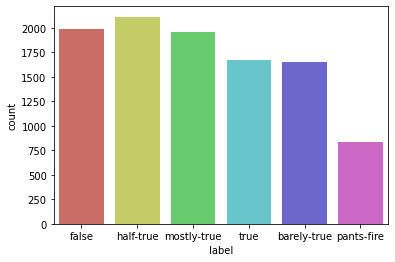

In [38]:
sns.countplot(x='label', data=df_data, palette='hls')

In [ ]:
sns.countplot(x='label', data=df_test, palette='hls')

In [ ]:
sns.countplot(x='label', data=df_val, palette='hls')

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


Word cloud for all news dataset


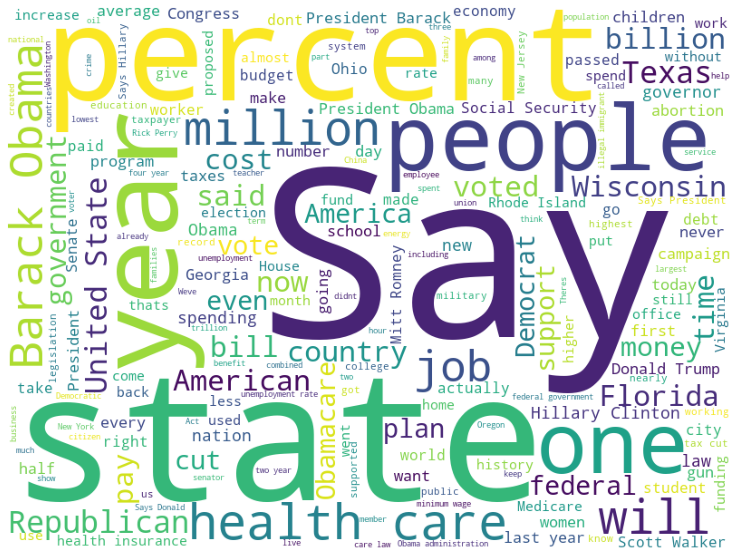

In [40]:
print('Word cloud for all news dataset')
cloud(' '.join(df_data['statement']))

In [ ]:
print('Word cloud for all news dataset')
cloud(' '.join(df_test['statement']))

In [ ]:
print('Word cloud for all news dataset')
cloud(' '.join(df_val['statement']))

**Performing Sentiment analysis using vader**

In [41]:
df_data['clean'].describe()

count                                      10238
unique                                     10215
top       chang rule filibuster president nomine
freq                                           3
Name: clean, dtype: object

In [ ]:
df_data['clean_justificaton'].describe()

In [42]:
import warnings
import nltk.sentiment
nltk.download('vader_lexicon')
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(df_data['clean'][0])
# print_sentiment_scores(df_data['clean_justificaton'][0])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


In [43]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [44]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [ ]:
sentiment = []
vader_pol = []
cmp_score = []
neg_score = []
pos_score = []
neu_score = []
for row in df_data['clean_justificaton']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    neg_score.append(get_pols[1])
    pos_score.append(get_pols[3])
    neu_score.append(get_pols[2])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
df_data['justification_sentiment_vector'] = sentiment
df_data['justification_vader_polarity'] = vader_pol
df_data['justification_neg_sentiment_score'] = neg_score
df_data['justification_pos_sentiment_score'] = pos_score
df_data['justification_neu_sentiment_score'] = neu_score
df_data['justification_sentiment_score'] = cmp_score
print(get_pols)

In [45]:
sentiment = []
vader_pol = []
cmp_score = []
neg_score = []
pos_score = []
neu_score = []
for row in df_data['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    neg_score.append(get_pols[1])
    pos_score.append(get_pols[3])
    neu_score.append(get_pols[2])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
df_data['sentiment_vector'] = sentiment
df_data['vader_polarity'] = vader_pol
df_data['neg_sentiment_score'] = neg_score
df_data['pos_sentiment_score'] = pos_score
df_data['neu_sentiment_score'] = neu_score
df_data['sentiment_score'] = cmp_score
print(get_pols)

Streaming output truncated to the last 5000 lines.
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.197, 0.524, 0.279, 0.2363]
[0, 0.471, 0.529, 0.0, -0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.787, 0.0, -0.4019]
[0, 0.104, 0.896, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.467, 0.533, 0.0, -0.5423]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.161, 0.518, 0.321, 0.4767]
[0, 0.0, 0.824, 0.176, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.178, 0.822, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.746, 0.254, 0.7579]
[0, 0.181, 0.819, 0.0, -0.4767]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.87, 0.13, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.604, 0.396, 0.7096]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.659, 0.341, 0.4767]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.0, 0.913, 0.087, 0.2263]
[0, 0.0, 1.0,

In [ ]:
sentiment = []
vader_pol = []
cmp_score = []

for row in df_test['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
df_test['sentiment_vector'] = sentiment
df_test['vader_polarity'] = vader_pol
df_test['sentiment_score'] = cmp_score

In [ ]:
sentiment = []
vader_pol = []
cmp_score = []

for row in df_val['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
df_val['sentiment_vector'] = sentiment
df_val['vader_polarity'] = vader_pol
df_val['sentiment_score'] = cmp_score

**Topic modelling using LDA**

In [46]:
df_data['index'] = df_data.index
data = df_data
# train_lda = data[['clean', 'clean_justificaton','index']]
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0.0,say anni list polit group support third trimme...,0.0
1.0,decline coal start start natur gas took start ...,1.0
2.0,hillary clinton agre john mccain vote give geo...,2.0
3.0,health care reform legis like mandat free sex ...,3.0


In [ ]:
df_test['index'] = df_test.index
data = df_test
test_lda = data[['clean', 'index']]
test_lda.head(4)

In [ ]:
df_val['index'] = df_val.index
data = df_val
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

In [47]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
# justification_processed_docs = train_lda['clean_justificaton'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0.0    [say, anni, list, polit, group, support, third...
1.0    [decline, coal, start, start, natur, gas, took...
2.0    [hillary, clinton, agre, john, mccain, vote, g...
3.0    [health, care, reform, legis, like, mandat, fr...
4.0               [econom, turnaround, start, end, term]
Name: clean, dtype: object

In [48]:
dictionary = gensim.corpora.Dictionary(processed_docs)
# dictionary_justification = gensim.corpora.Dictionary(justification_processed_docs)

In [49]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimmest
10 administr


In [ ]:
count = 0
for k, v in dictionary_justification.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

In [50]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# dictionary_justification.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [63]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus
# bow_corpus_justification = [dictionary_justification.doc2bow(doc) for doc in processed_docs]
# bow_corpus_justification[4310]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1)],
 [(10, 1),
  (14, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(17, 1), (38, 1), (39, 1), (40, 1)],
 [(17, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(47, 1), (48, 1), (49, 1), (50, 1), (51, 1)],
 [(36, 1),
  (43, 1),
  (47, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(18, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(5, 1),
  (28, 1),
  (66, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(28, 2), (79, 1), (80, 1), (81, 1), (82,

In [52]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 112 ("percent") appears 1 time.
Word 172 ("text") appears 1 time.
Word 278 ("iller") appears 1 time.
Word 367 ("popul") appears 1 time.
Word 372 ("florida") appears 1 time.
Word 378 ("immigra") appears 1 time.
Word 443 ("increas") appears 2 time.
Word 964 ("california") appears 1 time.


In [53]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
# tfidf_justification = models.TfidfModel(bow_corpus_justification)

In [54]:
corpus_tfidf = tfidf[bow_corpus]
# corpus_tfidf_justification = tfidf_justification[bow_corpus_justification]

In [267]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3225144908777856),
 (1, 0.4545600903253299),
 (2, 0.3845556844854817),
 (3, 0.4218415651691593),
 (4, 0.38844404757086143),
 (5, 0.1054390555500044),
 (6, 0.2586366457164002),
 (7, 0.36691560316626765)]


In [55]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
# lda_model_justification = gensim.models.LdaMulticore(bow_corpus_justification, num_topics=10, id2word=dictionary_justification, passes=2, workers=2)

In [56]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.027*"say" + 0.020*"get" + 0.018*"year" + 0.015*"percent" + 0.010*"republican" + 0.010*"go" + 0.009*"tax" + 0.009*"use" + 0.009*"state" + 0.009*"u"
Topic: 1 
Words: 0.040*"year" + 0.015*"say" + 0.014*"one" + 0.013*"peopl" + 0.011*"offic" + 0.009*"health" + 0.008*"u" + 0.008*"percent" + 0.008*"would" + 0.008*"florida"
Topic: 2 
Words: 0.054*"say" + 0.016*"state" + 0.013*"scott" + 0.011*"rick" + 0.010*"text" + 0.009*"student" + 0.009*"school" + 0.009*"peopl" + 0.009*"gov" + 0.008*"trump"
Topic: 3 
Words: 0.057*"percent" + 0.025*"year" + 0.024*"state" + 0.016*"say" + 0.014*"nation" + 0.011*"one" + 0.010*"obama" + 0.010*"tax" + 0.008*"pay" + 0.008*"debt"
Topic: 4 
Words: 0.032*"say" + 0.023*"state" + 0.016*"school" + 0.014*"republican" + 0.013*"law" + 0.012*"health" + 0.011*"million" + 0.010*"text" + 0.009*"plan" + 0.008*"new"
Topic: 5 
Words: 0.021*"state" + 0.018*"percent" + 0.017*"billion" + 0.013*"tax" + 0.013*"year" + 0.012*"sinc" + 0.011*"job" + 0.011*"say" + 0.010*

In [57]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
# lda_model_tfidf_justification = gensim.models.LdaMulticore(corpus_tfidf_justification, num_topics=10, id2word=dictionary_justification, passes=2, workers=4)

In [58]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.018*"tax" + 0.013*"percent" + 0.010*"cut" + 0.010*"plan" + 0.009*"say" + 0.008*"year" + 0.008*"incom" + 0.008*"obama" + 0.007*"budget" + 0.007*"school"
Topic: 1 Word: 0.010*"say" + 0.008*"u" + 0.007*"vote" + 0.007*"state" + 0.007*"voter" + 0.006*"percent" + 0.006*"tax" + 0.006*"health" + 0.006*"pro" + 0.006*"sent"
Topic: 2 Word: 0.012*"year" + 0.010*"say" + 0.009*"billion" + 0.008*"health" + 0.008*"percent" + 0.007*"vote" + 0.007*"increas" + 0.007*"care" + 0.007*"bill" + 0.006*"obama"
Topic: 3 Word: 0.011*"say" + 0.010*"presid" + 0.010*"obama" + 0.008*"said" + 0.007*"barack" + 0.007*"american" + 0.007*"tax" + 0.007*"state" + 0.006*"health" + 0.006*"would"
Topic: 4 Word: 0.012*"say" + 0.008*"time" + 0.008*"percent" + 0.007*"obama" + 0.007*"vote" + 0.007*"tax" + 0.007*"year" + 0.007*"debt" + 0.007*"romney" + 0.007*"state"
Topic: 5 Word: 0.011*"state" + 0.009*"say" + 0.009*"percent" + 0.008*"rate" + 0.008*"unemploy" + 0.007*"million" + 0.007*"florida" + 0.007*"school" + 0

In [59]:
processed_docs[4310]

['say',
 'state',
 'sen',
 'morgan',
 'carrot',
 'vote',
 'made',
 'easier',
 'sue',
 'doctor',
 'small',
 'busi',
 'even',
 'nurse',
 'put',
 'shade',
 'interest',
 'first']

In [60]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    # df_data['lda_score'] = score


Score: 0.4812065660953522	 
Topic: 0.057*"percent" + 0.025*"year" + 0.024*"state" + 0.016*"say" + 0.014*"nation" + 0.011*"one" + 0.010*"obama" + 0.010*"tax" + 0.008*"pay" + 0.008*"debt"

Score: 0.4387778639793396	 
Topic: 0.054*"say" + 0.016*"state" + 0.013*"scott" + 0.011*"rick" + 0.010*"text" + 0.009*"student" + 0.009*"school" + 0.009*"peopl" + 0.009*"gov" + 0.008*"trump"

Score: 0.010002845898270607	 
Topic: 0.048*"tax" + 0.030*"job" + 0.028*"say" + 0.021*"vote" + 0.015*"time" + 0.014*"rais" + 0.013*"million" + 0.012*"year" + 0.011*"cut" + 0.010*"bill"

Score: 0.01000223122537136	 
Topic: 0.032*"say" + 0.023*"state" + 0.016*"school" + 0.014*"republican" + 0.013*"law" + 0.012*"health" + 0.011*"million" + 0.010*"text" + 0.009*"plan" + 0.008*"new"

Score: 0.010002161376178265	 
Topic: 0.032*"obama" + 0.027*"say" + 0.019*"presid" + 0.013*"sent" + 0.011*"million" + 0.010*"barack" + 0.010*"country" + 0.010*"vote" + 0.009*"u" + 0.009*"right"

Score: 0.010002096183598042	 
Topic: 0.021*"st

In [68]:
for index, data in enumerate(bow_corpus):
    for index, score in sorted(lda_model_tfidf[bow_corpus[i]], key=lambda tup: -1*tup[1]):
        print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))
        df_data['lda_score'][i] = score

Streaming output truncated to the last 5000 lines.
Score: 0.34511321783065796	 
Topic: 0.011*"obama" + 0.009*"say" + 0.008*"state" + 0.008*"presid" + 0.008*"barack" + 0.006*"year" + 0.006*"job" + 0.006*"million" + 0.006*"u" + 0.006*"tax"

Score: 0.212412029504776	 
Topic: 0.010*"say" + 0.008*"u" + 0.007*"vote" + 0.007*"state" + 0.007*"voter" + 0.006*"percent" + 0.006*"tax" + 0.006*"health" + 0.006*"pro" + 0.006*"sent"

Score: 0.39248165488243103	 
Topic: 0.012*"year" + 0.010*"say" + 0.009*"billion" + 0.008*"health" + 0.008*"percent" + 0.007*"vote" + 0.007*"increas" + 0.007*"care" + 0.007*"bill" + 0.006*"obama"

Score: 0.3452033996582031	 
Topic: 0.011*"obama" + 0.009*"say" + 0.008*"state" + 0.008*"presid" + 0.008*"barack" + 0.006*"year" + 0.006*"job" + 0.006*"million" + 0.006*"u" + 0.006*"tax"

Score: 0.21230004727840424	 
Topic: 0.010*"say" + 0.008*"u" + 0.007*"vote" + 0.007*"state" + 0.007*"voter" + 0.006*"percent" + 0.006*"tax" + 0.006*"health" + 0.006*"pro" + 0.006*"sent"

Score: 0

In [491]:
for index, score in sorted(lda_model_tfidf_justification[bow_corpus_justification[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))
    df_data['lda_score_justification'] = score


Score: 0.5143953561782837	 
Topic: 0.011*"say" + 0.010*"secur" + 0.008*"percent" + 0.008*"social" + 0.008*"text" + 0.007*"job" + 0.007*"year" + 0.006*"support" + 0.006*"america" + 0.006*"get"

Score: 0.40558332204818726	 
Topic: 0.011*"say" + 0.009*"percent" + 0.008*"obamacare" + 0.007*"florida" + 0.007*"atlanta" + 0.007*"school" + 0.007*"student" + 0.007*"feder" + 0.007*"health" + 0.006*"insur"

Score: 0.010004051961004734	 
Topic: 0.012*"state" + 0.009*"percent" + 0.009*"world" + 0.007*"unit" + 0.007*"say" + 0.007*"gun" + 0.006*"year" + 0.006*"dont" + 0.006*"presid" + 0.006*"spend"

Score: 0.010003474541008472	 
Topic: 0.015*"tax" + 0.012*"say" + 0.008*"percent" + 0.008*"governor" + 0.007*"state" + 0.006*"want" + 0.006*"year" + 0.006*"pay" + 0.006*"vote" + 0.006*"u"

Score: 0.010002835653722286	 
Topic: 0.011*"tax" + 0.010*"say" + 0.009*"state" + 0.008*"percent" + 0.007*"number" + 0.007*"vote" + 0.006*"rick" + 0.006*"year" + 0.006*"billion" + 0.006*"u"

Score: 0.010002695955336094	 

In [ ]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(df_data) # TRAIN Document Vector

**Performing Sensational feature analysis**

In [72]:
downloaded = drive.CreateFile({'id': '1_i8uErJbxR6mI1DD5uypNkuw_qFIog6U'}) 
downloaded.GetContentFile('sensational_words_dict.csv')  
sensational_words = pd.read_csv('sensational_words_dict.csv', usecols=[0], sep='\t+', header=None)

In [73]:
corpus = []
for i in df_data['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]

print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
print(sensational_dictionary)
sensational_corpus.append(sensational_dictionary)

1443
absolutely Abuse account Acquisitiveness administration advantage Advocate Afflatus Afghanistan aid Al Qaeda Amazing america american amount Analytical Animalism Animosity Animus Antagonistic Anxiety Aphrodisiac Appetence Appetite Appetition Applaud Approach army Arrogant Assassination Assist Assurance Attack attacks attorney Audacity Authentic authorities authority Avalanche Awakening Backdoor Backed Backstabbing ban banks Banned Behind the scenes Belief believe benefits Best-selling Beware bill bills Bitterness Black market Blacklisted Blissful Blithe Blizzard Bloodcurdling Blow up Bomb Boost Bootleg border Brainchild Bravery Brazen Breathtaking Buck-up budget Bully Bumbling Buoy Burn campaign Campaign for Cancel anytime candidate candidates Carnality Catastrophe catholic Caution Censored Certainty Certified Chagrin chairman Champion charge charges Cheer Cheer up Cheerful china chinese Chipper Chirpy church cities class climate change Collapse comment companies Concealed Concern

In [496]:
corpus_justification = []
for i in df_data['clean_justificaton']:
    corpus_justification.append(i)
# corpus

sensational_corpus_justification=[]

print(len(sensational_words))
sensational_dictionary_justification = ' '.join(sensational_words[0].astype(str))
print(sensational_dictionary_justification)
sensational_corpus_justification.append(sensational_dictionary_justification)

1443
absolutely Abuse account Acquisitiveness administration advantage Advocate Afflatus Afghanistan aid Al Qaeda Amazing america american amount Analytical Animalism Animosity Animus Antagonistic Anxiety Aphrodisiac Appetence Appetite Appetition Applaud Approach army Arrogant Assassination Assist Assurance Attack attacks attorney Audacity Authentic authorities authority Avalanche Awakening Backdoor Backed Backstabbing ban banks Banned Behind the scenes Belief believe benefits Best-selling Beware bill bills Bitterness Black market Blacklisted Blissful Blithe Blizzard Bloodcurdling Blow up Bomb Boost Bootleg border Brainchild Bravery Brazen Breathtaking Buck-up budget Bully Bumbling Buoy Burn campaign Campaign for Cancel anytime candidate candidates Carnality Catastrophe catholic Caution Censored Certainty Certified Chagrin chairman Champion charge charges Cheer Cheer up Cheerful china chinese Chipper Chirpy church cities class climate change Collapse comment companies Concealed Concern

In [74]:
downloaded = drive.CreateFile({'id': '1tG2VMlxafd6E3aBVoBSBuN0-QG9HinBC'}) 
downloaded.GetContentFile('senticnet5.txt')  
sentic_net = pd.read_csv('senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])


In [75]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [76]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
# sensational_corpus_justification.append(dictionary)
print(len(senti_pos))

2040


**TF-IDF and Cosine Similarity**

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

# tfidf_corpus_justification = tfidfVec.fit_transform(corpus_justification)
# tf_idf_senti_justification = tfidfVec.fit_transform(sensational_corpus_justification)
# words = tfidfVec.get_feature_names()

In [78]:
tfidf_corpus.toarray()

array([[0.        , 0.        , 0.32864344, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [79]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [80]:
tfidfVec.vocabulary_

{'absolutely': 1,
 'advantage': 3,
 'qaeda': 742,
 'amazing': 4,
 'antagonistic': 6,
 'attack': 14,
 'authentic': 15,
 'authority': 16,
 'banned': 21,
 'behind': 24,
 'the': 929,
 'scenes': 881,
 'best': 26,
 'bill': 28,
 'bitterness': 29,
 'black': 31,
 'market': 187,
 'blacklisted': 32,
 'blissful': 34,
 'up': 990,
 'breathtaking': 37,
 'campaign': 40,
 'for': 95,
 'censored': 42,
 'cheer': 44,
 'cheerful': 45,
 'church': 47,
 'class': 48,
 'concealed': 52,
 'confessions': 53,
 'confidential': 55,
 'control': 59,
 'controversial': 61,
 'cost': 62,
 'cover': 63,
 'crime': 64,
 'critical': 65,
 'infrastructure': 126,
 'cyber': 67,
 'security': 886,
 'terror': 928,
 'daring': 68,
 'of': 388,
 'desire': 71,
 'disastrous': 72,
 'drug': 76,
 'ecstatic': 79,
 'on': 409,
 'emergency': 81,
 'response': 859,
 'enforcement': 83,
 'eye': 85,
 'opening': 415,
 'faith': 86,
 'faithfulness': 87,
 'fbi': 89,
 'first': 93,
 'responder': 858,
 'high': 118,
 'forbidden': 96,
 'force': 97,
 'fire': 92,


In [81]:
train_tfidf = tfidfVec.fit_transform(df_data['clean'])
# train_tfidf_justification = tfidfVec.fit_transform(df_data['clean_justificaton'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

Training dim: (10238, 1000)
[[0.         0.         0.32864344 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [82]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
# similarity_score_justification = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

# for i in range(len(train_tfidf.toarray())):
#     similarity_score_justification.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus_justification[i].toarray()))

In [83]:
df_data['sensational_score'] = similarity_score
# df_data['sensational_score_justification'] = similarity_score_justification
df_data.head(5)

,statement,label,label-numeric,score_history,clean,sentiment_vector,vader_polarity,neg_sentiment_score,pos_sentiment_score,neu_sentiment_score,sentiment_score,index,lda_score,sensational_score
0.0,Says the Annies List political group supports ...,false,1,0.0,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.123,0.221,0.656,0.2960,0.0,0.010002,0.078189
1.0,When did the decline of coal start? It started...,half-true,3,0.0,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.000,0.000,1.000,0.0000,1.0,0.010002,0.077214
2.0,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true,4,0.0,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.161,0.194,0.645,0.1280,2.0,0.010002,0.082364
3.0,Health care reform legislation is likely to ma...,false,1,0.0,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.000,0.562,0.438,0.8402,3.0,0.010002,0.045242
4.0,The economic turnaround started at the end of ...,half-true,3,0.0,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.000,0.000,1.000,0.0000,4.0,0.010002,0.073396


**Word2Vec**

In [84]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [86]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in df_data['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
# for news in df_test['clean']:
#     test_words.append(news.split())
# print(test_words)

In [87]:
train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [88]:
# Unload unneccessary memory once the learning process is done.
train_w2v.init_sims(replace = True)

In [89]:
train_w2v.most_similar("trump")

[('donald', 0.9855474233627319),
 ('said', 0.9764436483383179),
 ('say', 0.972690999507904),
 ('hillary', 0.9708623290061951),
 ('want', 0.9673697352409363),
 ('support', 0.9615892767906189),
 ('campaign', 0.9615023136138916),
 ('candid', 0.9606951475143433),
 ('sent', 0.9591297507286072),
 ('even', 0.9588178992271423)]

# Bidirectional GRU

This is the first attempt to build a model to predict misleading intentions of.

**Creating a Bidirectional GRU Model**

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
df_data.info()

In [ ]:
def label_separated_data(df):
  # df = pd.read_csv(filename, encoding = "latin1", names = ["Sentence", "Intent"])
  print(df.head())
  label = df['label-numeric']
  unique_label = list(set(label))
  statements = list(df['statement'])
  
  return (label, unique_label, statements)

In [ ]:
label, unique_label, statements = label_separated_data(df_data)

In [ ]:
print(unique_label)

In [ ]:
print(statements)

In [ ]:
print(statements[:1])

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

In [ ]:
stemmer = LancasterStemmer()

In [ ]:
import re

In [ ]:
def cleaning(statements):
  words = []
  for s in statements:
    clean = re.sub(r'[^ a-z A-Z 0-9]', " ", s)
    w = word_tokenize(clean)
    #stemming
    words.append([i.lower() for i in w])
    
  return words  

In [ ]:
cleaned_words = cleaning(statements)
print(len(cleaned_words))
print(cleaned_words[:2])  

In [ ]:
def create_tokenizer(words, filters = ''):
  token = Tokenizer()
  token.fit_on_texts(words)
  return token

In [ ]:
def max_length(words):
  return(len(max(words, key = len)))

In [ ]:
word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(word_tokenizer.word_index) + 1
max_length = max_length(cleaned_words)

print("Vocab Size = %d and Maximum length = %d" % (vocab_size, max_length))

In [ ]:
def encoding_doc(token, words):
  return(token.texts_to_sequences(words))

In [ ]:
encoded_doc = encoding_doc(word_tokenizer, cleaned_words)

In [ ]:
def padding_doc(encoded_doc, max_length):
  return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [ ]:
padded_doc = padding_doc(encoded_doc, max_length)

In [ ]:
padded_doc[:5]

In [ ]:
print("Shape of padded docs = ",padded_doc.shape)

In [ ]:
output_tokenizer = create_tokenizer(statements)

In [ ]:
output_tokenizer.word_index

In [ ]:
encoded_output = encoding_doc(output_tokenizer, statements)

In [ ]:
encoded_output = np.array(encoded_output).reshape(len(encoded_output), 1)

In [ ]:
encoded_output.shape

In [ ]:
print(encoded_output)

In [ ]:
def one_hot(encode):
  o = OneHotEncoder(sparse = False)
  return(o.fit_transform(encode))

In [ ]:
df_train.shape

In [ ]:
print(encoded_output)

In [ ]:
# output_one_hot = one_hot(encoded_output)

In [ ]:
# output_one_hot.shape

**Creating the model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, val_X, train_Y, val_Y = train_test_split(padded_doc, encoded_output, shuffle = True, test_size = 0.2)

In [ ]:
print("Shape of train_X = %s and train_Y = %s" % (train_X.shape, train_Y.shape))
print("Shape of val_X = %s and val_Y = %s" % (val_X.shape, val_Y.shape))

In [ ]:
def create_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 128, input_length = max_length, trainable = False))
  model.add(Bidirectional(LSTM(128)))
  # model.add(LSTM(128))
  model.add(Dense(32, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(21, activation = "softmax"))
  
  return model

In [ ]:
model = create_model(vocab_size, max_length)

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

In [ ]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# hist = model.fit(train_X, train_Y, epochs = 100, batch_size = 32, validation_data = (val_X, val_Y), callbacks = [checkpoint])

In [ ]:
# model = load_model("model.h5")

**Model created, now predicting to check if the model is working**

In [ ]:
def predictions(text):
  clean = re.sub(r'[^ a-z A-Z 0-9]', " ", text)
  test_word = word_tokenize(clean)
  test_word = [w.lower() for w in test_word]
  test_ls = word_tokenizer.texts_to_sequences(test_word)
  print(test_word)
  #Check for unknown words
  if [] in test_ls:
    test_ls = list(filter(None, test_ls))
    
  test_ls = np.array(test_ls).reshape(1, len(test_ls))
 
  x = padding_doc(test_ls, max_length)
  
  pred = model.predict_proba(x)
  print(pred)
  
  return pred

In [ ]:
def get_final_output(pred, classes):
  predictions = pred[0]
 
  classes = np.array(classes)
  print(classes)
  ids = np.argsort(-predictions)
  print(ids)
  # break
  classes = classes[ids%6]
  predictions = -np.sort(-predictions)
 
  for i in range(pred.shape[1]):
    print("%s has confidence = %s" % (classes[i], (predictions[i])))



In [ ]:
text = "Says the Annies List political group supports third-trimester abortions on demand."
pred = predictions(text)
get_final_output(pred, unique_label)

**From the output we can see that the model does not give us a prediction.**

# **Muller Loop**

**Applying Muller loop to determine the best model to predict.**

In [90]:
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.preprocessing import StandardScaler
  from matplotlib.colors import ListedColormap
  import time
  import xgboost as xgb
  from xgboost import XGBClassifier
  import sklearn.datasets as data
  import matplotlib.pyplot as plt
  from matplotlib.colors import ListedColormap
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.linear_model import LogisticRegression, SGDClassifier
  from sklearn.datasets import make_moons, make_circles, make_classification
  from sklearn.neural_network import MLPClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.svm import LinearSVC
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from collections import Counter
  from yellowbrick import ROCAUC
  from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

In [91]:
def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
                  results = df.query(query)
                  results[col].hist(ax=ax, bins=bins); 
                  if y_label:
                      ax.set_ylabel(y_label)
                  if x_label:
                      ax.set_xlabel(x_label)
                  ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB

In [92]:
classifierList = []

def featureTransformation(X_data_reshape,y_data):
  classifierList.clear()
  names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
          #  "Gaussian Process",
          "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
          "Naive Bayes", 
          # "QDA", 
          "XGB"]
  classifiers = [
      KNeighborsClassifier(2),
      SVC(kernel="linear", C=0.025),
      SVC(gamma=2, C=1),
      # GaussianProcessClassifier(1.0 * RBF(1.0)),
      DecisionTreeClassifier(max_depth=3),
      RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
      MLPClassifier(alpha=1, max_iter=1000),
      AdaBoostClassifier(),
      GaussianNB(),
      # QuadraticDiscriminantAnalysis(),
      XGBClassifier(scale_pos_weight=99)]
  
  datasets = [df_data]


  figure = plt.figure(figsize=(19, 7))
  i = 1
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = X_data_reshape, y_data

      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.2)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      h=1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train.values, cmap=cm_bright,
                edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test.values, cmap=cm_bright, alpha=0.6,
                edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel("Factors affecting Socioeconomic")
      ax.set_ylabel("Socioeconomic Status")
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      max_score = 0.0
      max_class = ''
      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          classifierMatrix = []
          start_time = time.time()
          clf.fit(X_train, y_train)
          score = 100.0 * clf.score(X_test, y_test)
          classifierMatrix.append(name)
          classifierMatrix.append(score)
          try:
              visualizer = ROCAUC(clf, micro=False, macro=False, per_class=True)
              visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
              learningCurve = visualizer.score(X_test, y_test) # Evaluate the model on the test data
              classifierMatrix.append(100.0 * learningCurve)
              g = visualizer.poof()
              plt.show()
          except Exception as e: 
              #print("An exception occurred")
              visualizer = ROCAUC(clf, micro=False, macro=False, per_class=False)
              visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
              learningCurve = visualizer.score(X_test, y_test) # Evaluate the model on the test data
              classifierMatrix.append(100.0 * learningCurve)
              g = visualizer.poof()
              plt.show()
              #print(e)
          try:      
              fig, ax = plt.subplots()
              cm = ConfusionMatrix(clf, classes=[1, 0], ax=ax)
              cm.fit(X_train, y_train)
              confusionMatrixScore = cm.score(X_test, y_test)
              classifierMatrix.append(100.0 * confusionMatrixScore)
              cm.poof()
              plt.show()

              clf.fit(X_train, y_train)
              y_pred_proba = clf.predict_proba(X_test)

              df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
              # classifierMatrix.append(y_pred_proba)
              fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
              # show true-pos 
              bins = np.arange(0, 1.01, 0.1)
              show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
              show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
              show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
              show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
              fig.suptitle("Probabilities per Confusion Matrix cell");
              plt.show()
          except Exception as e: 
              print("An exception occurred")
              print(e)
          
            
          print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
          
          
          classifierMatrix.append(time.time() - start_time)
          classifierList.append(classifierMatrix)
          if score > max_score:
              clf_best = clf
              max_score = score
              max_class = name
      print(80*'-' )

      print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
      #plot the output of the various algorithms



In [93]:
import pandas as pd 
import matplotlib.pyplot as plt 

def classifierTable(classifierList):
    df = pd.DataFrame(classifierList, columns = ['Classifier', 'Accuracy Score',  
                                        'Learning Score', 'Confusion Matrix Score', 
                                        'Training Time(Sec)'] ) 

    df['Accuracy Score'] = df['Accuracy Score'].astype(float)
    df['Learning Score'] = df['Learning Score'].astype(float)
    df['Confusion Matrix Score'] = df['Confusion Matrix Score'].astype(float)


    df_sorted = df.sort_values(by=['Accuracy Score'],ascending=False)

    print('Classifier Comparison Table')
    from IPython.display import display, HTML

    # Assuming that dataframes df1 and df2 are already defined:
    print("Classifiers:")
    display(df_sorted)
    print('---------------------------------------------------------------------------------------------------')
    df_sorted.plot.bar(x='Classifier',rot=0, figsize=(16, 4))

In [94]:
df_data.head(1)

,statement,label,label-numeric,score_history,clean,sentiment_vector,vader_polarity,neg_sentiment_score,pos_sentiment_score,neu_sentiment_score,sentiment_score,index,lda_score,sensational_score
0.0,Says the Annies List political group supports ...,false,1,0.0,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.123,0.221,0.656,0.296,0.0,0.010002,0.078189


In [95]:
df_data = df_data.dropna()

In [96]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10216 entries, 0.0 to 10268.0
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   statement            10216 non-null  object 
 1   label                10216 non-null  object 
 2   label-numeric        10216 non-null  int64  
 3   score_history        10216 non-null  float64
 4   clean                10216 non-null  object 
 5   sentiment_vector     10216 non-null  object 
 6   vader_polarity       10216 non-null  int64  
 7   neg_sentiment_score  10216 non-null  float64
 8   pos_sentiment_score  10216 non-null  float64
 9   neu_sentiment_score  10216 non-null  float64
 10  sentiment_score      10216 non-null  float64
 11  index                10216 non-null  float64
 12  lda_score            10216 non-null  float32
 13  sensational_score    10216 non-null  float64
dtypes: float32(1), float64(7), int64(2), object(4)
memory usage: 1.1+ MB


In [517]:
# df_ml = df_data[['label-numeric','lda_score','lda_score_justification','sensational_score_justification','sensational_score','neg_sentiment_score','justification_neg_sentiment_score','pos_sentiment_score','justification_pos_sentiment_score','neu_sentiment_score','justification_neu_sentiment_score']].copy().dropna()

In [97]:
df_ml = df_data[['label-numeric','lda_score','sensational_score','neg_sentiment_score','pos_sentiment_score','neu_sentiment_score',]].copy().dropna()

In [98]:
X_data_reshape= df_ml.drop('label-numeric', axis=1)
y_data = df_ml.iloc[:, [0]]

X = StandardScaler().fit_transform(X_data_reshape)
# X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)

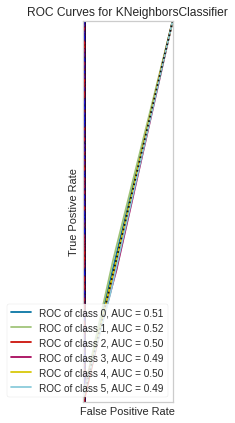

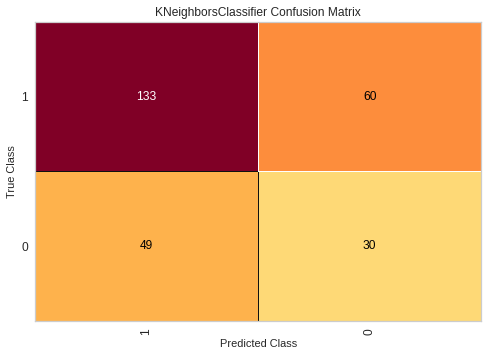

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = Nearest Neighbors, Score (test, accuracy) = 18.35, Training time = 1.04 seconds


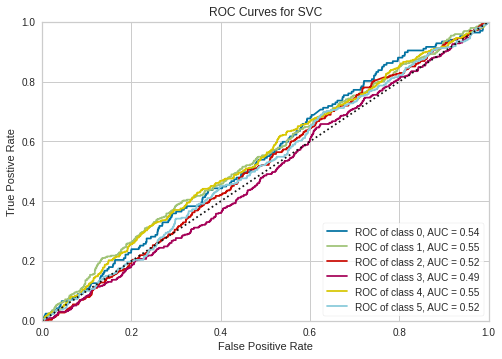

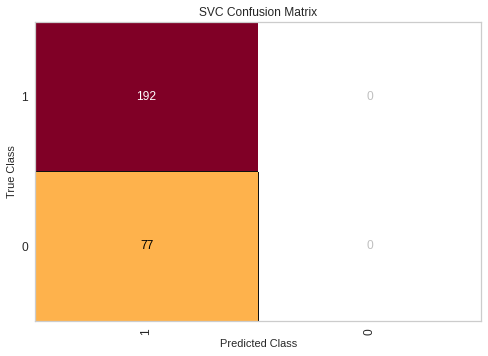

An exception occurred
predict_proba is not available when  probability=False
Classifier = Linear SVM, Score (test, accuracy) = 20.89, Training time = 8.46 seconds


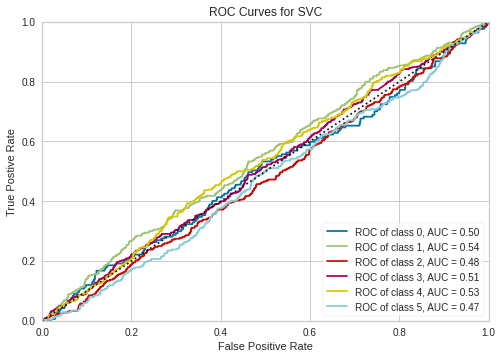

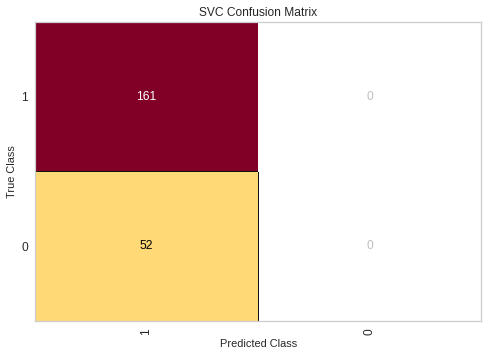

An exception occurred
predict_proba is not available when  probability=False
Classifier = RBF SVM, Score (test, accuracy) = 21.04, Training time = 26.28 seconds


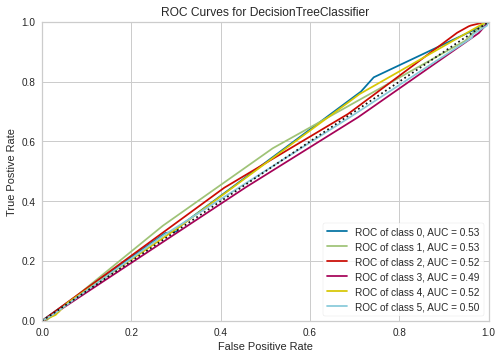

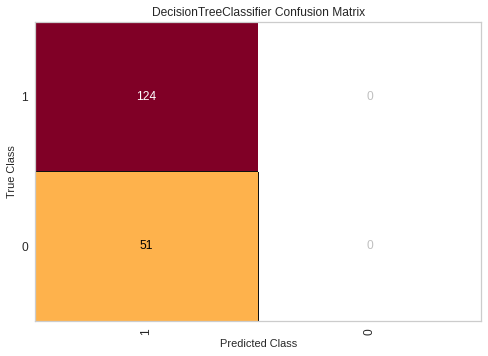

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = Decision Tree, Score (test, accuracy) = 20.69, Training time = 0.35 seconds


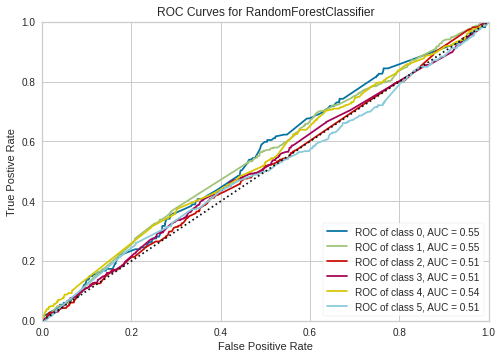

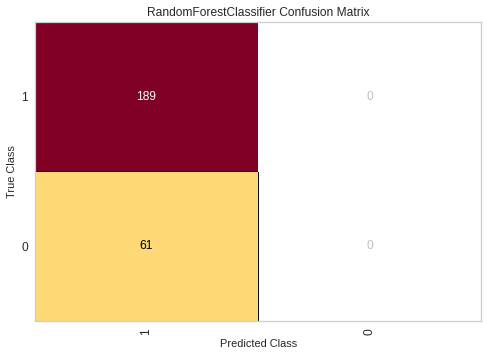

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = Random Forest, Score (test, accuracy) = 21.23, Training time = 0.56 seconds


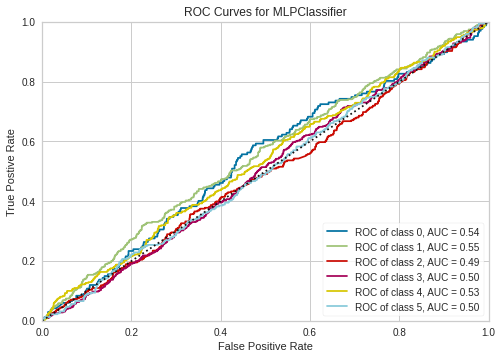

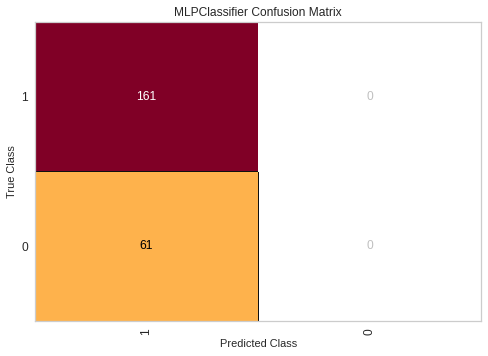

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = Neural Net, Score (test, accuracy) = 22.16, Training time = 10.21 seconds


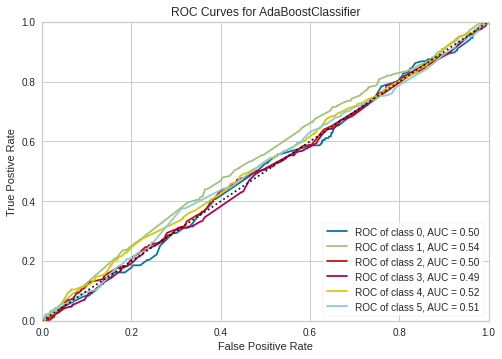

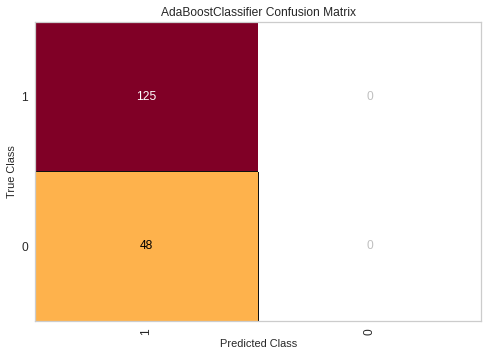

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = AdaBoost, Score (test, accuracy) = 21.58, Training time = 2.06 seconds


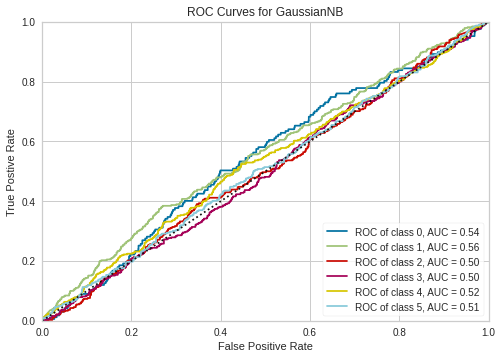

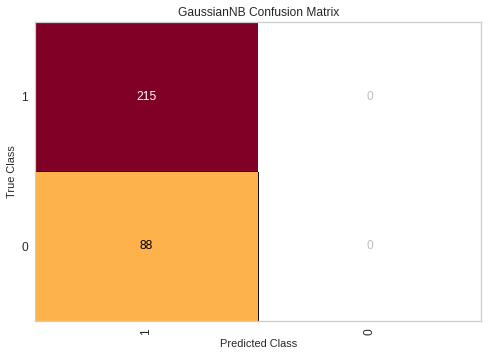

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = Naive Bayes, Score (test, accuracy) = 20.50, Training time = 0.33 seconds


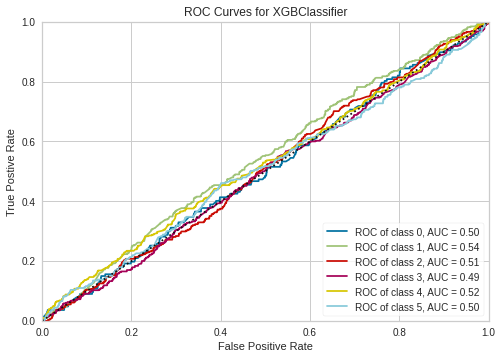

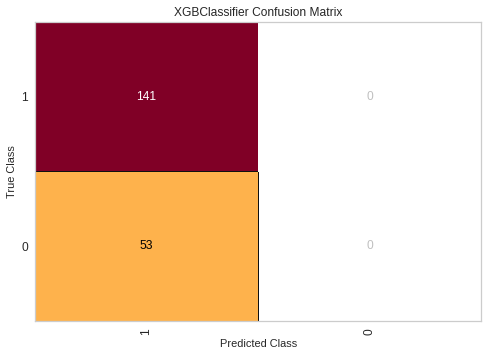

An exception occurred
Shape of passed values is (1, 2), indices imply (2044, 2)
Classifier = XGB, Score (test, accuracy) = 21.92, Training time = 7.36 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Neural Net, Score (test, accuracy) = 22.16


In [99]:
featureTransformation(X_data_reshape,y_data)

Classifier Comparison Table
Classifiers:


,Classifier,Accuracy Score,Learning Score,Confusion Matrix Score,Training Time(Sec)
5,Neural Net,22.162427,22.260274,22.162427,10.211418
8,XGB,21.917808,21.917808,21.917808,7.356605
6,AdaBoost,21.575342,21.575342,21.575342,2.064222
4,Random Forest,21.232877,22.553816,20.988258,0.557964
2,RBF SVM,21.037182,21.037182,21.037182,26.275707
1,Linear SVM,20.890411,20.890411,20.890411,8.457385
3,Decision Tree,20.694716,20.694716,20.694716,0.345831
7,Naive Bayes,20.499022,20.499022,20.499022,0.325485
0,Nearest Neighbors,18.346380,18.346380,18.346380,1.035645


---------------------------------------------------------------------------------------------------


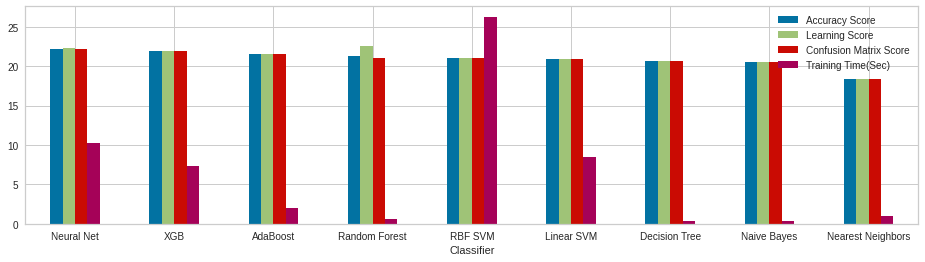

In [100]:
classifierTable(classifierList)

**Based on the above table, I got the following best approached on each try:**
1. Decision tree
2. Naive Bayes
3. Linear SVM
4. Random Forest

**Applying Decision tree to predict.**

In [308]:
clf = DecisionTreeClassifier(max_depth = 3, criterion='gini', random_state = 0)
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [309]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.2384706932460577

In [219]:
import pickle
Pkl_Filename = "decision_tree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

**Applying Naive Bayes to predict.**

In [312]:
clf = GaussianNB()
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [313]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.2356441535257364

**Applying Random Forest to predict.**

In [374]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [375]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.25609937518595655

In [376]:
import pickle
Pkl_Filename = "random_forest.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [ ]:
# import pickle
# with open('random_forest.pkl', 'rb') as file:  
#         linear_svm_model = pickle.load(file)

# text = "On residency requirements for public workers"
# pred = linear_svm_model.predict(text)
# print(pred[0])

**Applying Linear SVM to predict.**

In [316]:
clf = SVC(kernel="linear", C=0.025)
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [317]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.2377268670038679

In [227]:
import pickle
Pkl_Filename = "linear_svm.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

**Applying ADA Boost to predict.**

In [318]:
clf = AdaBoostClassifier(n_estimators=10, algorithm='SAMME')
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [319]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.2377268670038679

**Applying QDA to predict.**

In [320]:
clf = QuadraticDiscriminantAnalysis()
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [321]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.09714370722999108

In [232]:
import pickle
Pkl_Filename = "Quadratric_Discriminant_Analysis.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

**Applying Neural Network to predict.**

In [101]:
clf = MLPClassifier(alpha=1, max_iter=1000)
X, y = X_data_reshape, y_data
# clf.fit(X, y)
X = StandardScaler().fit_transform(X_data_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=.2)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [102]:
pred = clf.predict(X)
metrics.accuracy_score(y, pred)

0.22278778386844167

In [103]:
import pickle
Pkl_Filename = "neural_net.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

**Initial trial with only the Liar Liar dataset**

Trial 1: 
1.   Decision Tree - 85.71 %
2.   Naive Bayes - 43.80 %
3.   Random Forest - 44.11 %
4.   Linear SVM - 44.01 %


Mistakes:- 
while converting the labels into numeric, didnt consider the case of the label in the dataset. This led to some uppercase data to have wrong label numeric values assigned to it. After creating the label-numeric value for each label, in one of the steps the numeric column was dropped and hence, was not considered at all while predicting. the numeric value of the label is important to the statement and its impact.


Trial 2:
Amalgamated the scrapped politifact dataset.
output of the muller loop shows Random forest, ADA Boost and Linear SVM as the top three model to get the prediction for this dataset with the mistakes mentioned above taken care of.
1.   Decision Tree - 83.43 %
2.   Naive Bayes - 21.56 %
3.   Random Forest - 24.88 %
4.   Linear SVM - 21.68 %
5.   ADA Boost - 21.60%






**Creating Class**

In [4]:
import pickle
import re
from collections import Counter
import warnings
import nltk.sentiment
import pandas as pd
import gensim
from gensim import corpora, models
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
import warnings
nltk.download('punkt')
nltk.download('vader_lexicon')
warnings.filterwarnings('ignore')
nltk.download('wordnet')
nltk.download("stopwords") 


def predictIntention(text):
    def cleaning(statement):
        import nltk
        
        # 1. Remove non-letters/Special Characters and Punctuations
        news = re.sub("[^a-zA-Z]", " ", statement)
        
        # 2. Convert to lower case.
        news =  news.lower()
        
        # 3. Tokenize.
        news_words = nltk.word_tokenize( news)
        
        # 4. Convert the stopwords list to "set" data type.
        stops = set(nltk.corpus.stopwords.words("english"))
        
        # 5. Remove stop words. 
        words = [w for w in  news_words  if not w in stops]
        
        # 6. Lemmentize 
        wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
        
        # 7. Stemming
        stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
        
        # 8. Join the stemmed words back into one string separated by space, and return the result.
        return " ".join(stems)

    def clean_spell_checker(df):
      
        model = gensim.models.KeyedVectors.load_word2vec_format('/content/Datasets/GoogleNews-vectors-negative300.bin.gz', binary=True)
        # model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)
        words = model.index2word
        w_rank = {}
        for i,word in enumerate(words):
            w_rank[word] = i

        WORDS = w_rank

        def words(text): return re.findall(r'\w+', text.lower())

        def P(word, N=sum(WORDS.values())): 
            "Probability of `word`."
            return - WORDS.get(word, 0)

        def correction(word): 
            "Most probable spelling correction for word."
            return max(candidates(word), key=P)

        def candidates(word): 
            "Generate possible spelling corrections for word."
            return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

        def known(words): 
            "The subset of `words` that appear in the dictionary of WORDS."
            return set(w for w in words if w in WORDS)

        def edits1(word):
            "All edits that are one edit away from `word`."
            letters    = 'abcdefghijklmnopqrstuvwxyz'
            splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
            deletes    = [L + R[1:]               for L, R in splits if R]
            transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
            replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
            inserts    = [L + c + R               for L, R in splits for c in letters]
            return set(deletes + transposes + replaces + inserts)

        def edits2(word): 
            "All edits that are two edits away from `word`."
            return (e2 for e1 in edits1(word) for e2 in edits1(e1))

        def spell_checker(text):
            all_words = re.findall(r'\w+', text.lower()) # split sentence to words
            spell_checked_text  = []
            for i in range(len(all_words)):
                spell_checked_text.append(correction(all_words[i]))
            return ' '.join(spell_checked_text)

        df['clean'] = df['clean'].apply(spell_checker)

        return df
        
    cleaned_word = []
    def clean(df):
        df['clean'] = df['clean'].apply(cleaning)
        df = clean_spell_checker(df) 
        return df


    sentiment_vector = []
    vader_polarity = []
    sentiment_score = []
    def sentiment_analysis(df):
        senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

        def print_sentiment_scores(sentence):
            snt = senti.polarity_scores(sentence)
            # print("{:-<40} \n{}".format(sentence, str(snt)))
            
        print_sentiment_scores(df['clean'][0])


        def get_vader_polarity(snt):
            if not snt:
                return None
            elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
                return -1
            elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
                return 1
            else:
                return 0


        #Function to determine if a text is negative(-1) or postive (1) or neutral (0)
        def get_polarity_type(sentence):
            sentimentVector = []
            snt = senti.polarity_scores(sentence)
            sentimentVector.append(get_vader_polarity(snt))
            sentimentVector.append(snt['neg'])
            sentimentVector.append(snt['neu'])
            sentimentVector.append(snt['pos'])
            sentimentVector.append(snt['compound'])
            
            # print(sentimentVector)
            return sentimentVector

        get_pols = get_polarity_type(text)
            
        sentiment_vector = get_pols[1:]
        vader_polarity = get_pols[0]
        neg_score = get_pols[1]
        neu_score = get_pols[2]
        pos_score = get_pols[3]
        sentiment_score = get_pols[1:][-1]

        return neg_score, neu_score, pos_score


    def get_sensational_score(df):
        # train_lda = pd.DataFrame([[text,0]],columns=['clean', 'index'])
        sensational_words = pd.read_csv('/content/Datasets/sensational_words_dict.csv', usecols=[0], sep='\t+', header=None)
        corpus = []
        corpus.append(text)
        sensational_corpus=[]
        # print(len(sensational_words))
        sensational_dictionary = ' '.join(sensational_words[0].astype(str))
        sensational_corpus.append(sensational_dictionary)
        # print(sensational_corpus)

        sentic_net = pd.read_csv('/content/Datasets/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
        warnings.filterwarnings("ignore")
        sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
        sentic_net = sentic_net.reset_index(drop=True)
        # print("Senticnet Vocab Size: ",len(sentic_net))
        # print(sentic_net.head(10))

        # sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
        senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
        senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
        dictionary = ' '.join(senti_pos.Token.astype(str))
        sensational_corpus.append(dictionary)
        # print(len(senti_pos))

        tfidfVec = TfidfVectorizer(max_features=1000)

        train_tfidf = tfidfVec.fit_transform(df['clean'])
        # print('Training dim:', train_tfidf.shape)
        # print(train_tfidf.A[:10])
        # print(train_tfidf.shape.index)

        max_f = train_tfidf.shape[1]
        print("max_f: ", max_f)

        tfidfVec = TfidfVectorizer(max_features=max_f)
        tfidf_corpus = tfidfVec.fit_transform(corpus)
        tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
        words = tfidfVec.get_feature_names()
        # print(words)

        tfidf_corpus.toarray()

        tf_idf_senti.toarray()

        tfidfVec.vocabulary_
        
        similarity_score = []
        for i in range(len(train_tfidf.toarray())):
            similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

        return similarity_score[0]


    def get_lda_score(df):
        data = df
        train_lda = data[['clean','index']]
        processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
        print(processed_docs)
        dictionary = gensim.corpora.Dictionary(processed_docs)
        print(dictionary)
        # dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
        bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
        print(bow_corpus)
        tfidf = models.TfidfModel(bow_corpus)
        corpus_tfidf = tfidf[bow_corpus]
        lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
        lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
        for i, data in enumerate(bow_corpus):
            for index, score in sorted(lda_model_tfidf[bow_corpus[i]], key=lambda tup: -1*tup[1]):
                df['lda_score'][i] = score

        return df['lda_score'][0]


    df_data = pd.DataFrame([[text,0]],columns=['clean', 'index'])
    df_data = clean(df_data)
    neg_score, neu_score, pos_score = sentiment_analysis(df_data)
    sensational_score = get_sensational_score(df_data)
    lda_score = get_lda_score(df_data)

    # print("clean: ", clean)
    # print("Negative sentiment score: ", sentiment_score)
    # print("Sentiment vector: ", sentiment_vector)
    # print("Vader ploarity: ", vader_polarity)
    # print("Sensational Score: ", sensational_score)
    # print("Lda score: ", lda_score)

    df_scores = pd.DataFrame([[lda_score,sensational_score,neg_sentiment_score,pos_sentiment_score,neu_sentiment_score]],
                      columns=['lad_score', 'sensational_score','neg_sentiment_score','pos_sentiment_score','neu_sentiment_score'])
    
    with open('neural_net.pkl', 'rb') as file:  
        linear_svm_model = pickle.load(file)

    pred = linear_svm_model.predict(df_scores)
    # pred_label = pred[0,0];
    print(pred[0])
    return pred[0]

text='Building a wall on the U.S.-Mexico border will take literally years.'
result = predictIntention(text)
print("Result: ", result)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0    [say, new, york, post, cover, use, headline, f...
Name: clean, dtype: object
Dictionary(12 unique tokens: ['cover', 'donald', 'fire', 'headline', 'imag']...)
[[]]


ValueError: ignored

In [379]:
text='On residency requirements for public workers'
result = predictIntention(text)

max_f:  4
[]
clean:  resid requir public worker
Sentiment score:  0.0
Sentiment vector:  0.758
Vader ploarity:  0.242
Sensational Score:  0.9689627902499087
Lda score:  0.8199998736381531
[1]
1
